In [95]:
import pandas as pd
import numpy as np
import geopandas as gdf
import matplotlib.pyplot as plt
#gdf.crs = {'epsg:2176'}

In [96]:
world=gdf.read_file(gdf.datasets.get_path('naturalearth_lowres'))
world.head()

data=world[world['continent']=="Europe"]

In [97]:
data.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516..."
21,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.143 79.674, 15.523 80.016, ..."
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ..."
110,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.027 58.856, 11.468 59.432, 12.300..."
111,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((28.177 56.169, 29.230 55.918, 29.372..."


In [98]:
data['name'].unique()

array(['Russia', 'Norway', 'France', 'Sweden', 'Belarus', 'Ukraine',
       'Poland', 'Austria', 'Hungary', 'Moldova', 'Romania', 'Lithuania',
       'Latvia', 'Estonia', 'Germany', 'Bulgaria', 'Greece', 'Albania',
       'Croatia', 'Switzerland', 'Luxembourg', 'Belgium', 'Netherlands',
       'Portugal', 'Spain', 'Ireland', 'Italy', 'Denmark',
       'United Kingdom', 'Iceland', 'Slovenia', 'Finland', 'Slovakia',
       'Czechia', 'Bosnia and Herz.', 'Macedonia', 'Serbia', 'Montenegro',
       'Kosovo'], dtype=object)

In [99]:
data.crs="EPSG:2176"

### Focus map on continental Europe

* Make the map smaller by exluding countries at the edge of the projection
* Remove **Rusia|Norway|Belarus|Ukraine**

In [101]:
countries=data['name'].unique().tolist()
for idx in [0,1,4,5]:
    del countries[idx]

In [ ]:
### Map contour

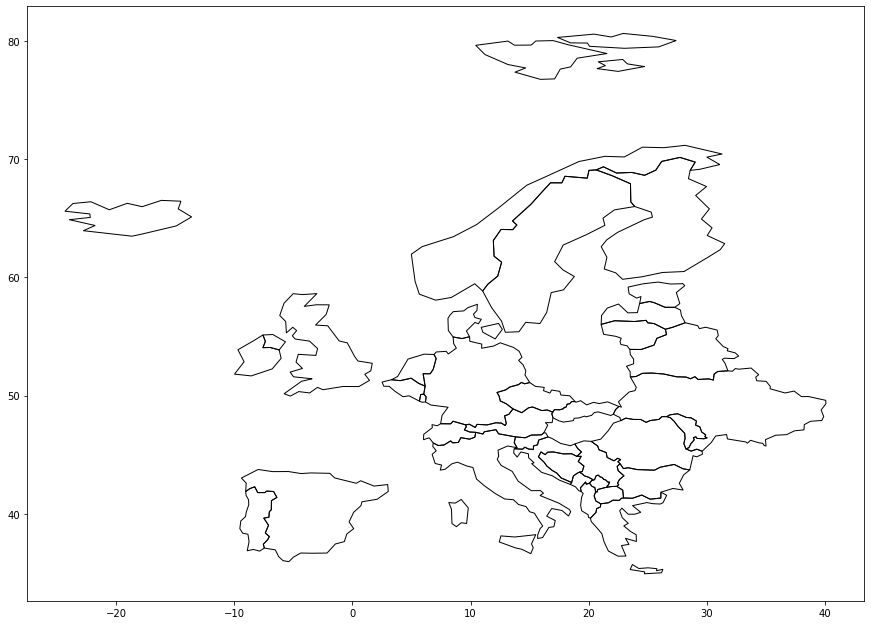

In [92]:
data[data['name'].isin(countries)].plot(figsize=(15,15), color='none', edgecolor='black', zorder=3)